BÀI KIỂM TRA GIỮA KÌ

In [29]:
#CÂU 1,2,3,4,5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Product': ['Laptop', 'Phone', 'Chair', 'Desk', 'Headphone', 'Monitor', 'Sofa', 'Keyboard', 'Mouse', 'Tablet'],
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture', 'Accessories', 'Electronics', 'Furniture', 'Accessories', 'Accessories', 'Electronics'],
    'Price': [1500, 800, 120, 300, 200, 600, 700, 150, 50, 400],
    'Date': pd.to_datetime(['2024-01-15', '2024-02-10', '2024-03-15', '2024-03-18', '2024-04-12', '2024-05-20', '2024-06-20', '2024-02-08', '2024-07-14', '2024-09-30']),
    'Quantity': [2, 5, 3, 1, 4, 2, 1, 6, 8, 3]
}
df = pd.DataFrame(data)
# 2
print(df.info())
# 3
print("Trung bình số lượng Price:", df['Price'].mean())
# 4
print(df.groupby('Category')['Quantity'].mean())
# 5
df_sorted = df.sort_values(by='Price', ascending=False)# giảm True là tăng
print(df_sorted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Product   10 non-null     object        
 1   Category  10 non-null     object        
 2   Price     10 non-null     int64         
 3   Date      10 non-null     datetime64[ns]
 4   Quantity  10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 532.0+ bytes
None
Trung bình số lượng Price: 482.0
Category
Accessories    6.000000
Electronics    3.000000
Furniture      1.666667
Name: Quantity, dtype: float64
     Product     Category  Price       Date  Quantity
0     Laptop  Electronics   1500 2024-01-15         2
1      Phone  Electronics    800 2024-02-10         5
6       Sofa    Furniture    700 2024-06-20         1
5    Monitor  Electronics    600 2024-05-20         2
9     Tablet  Electronics    400 2024-09-30         3
3       Desk    Furniture    

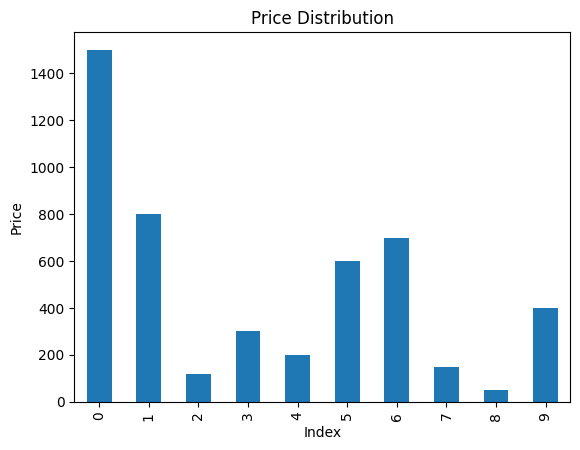

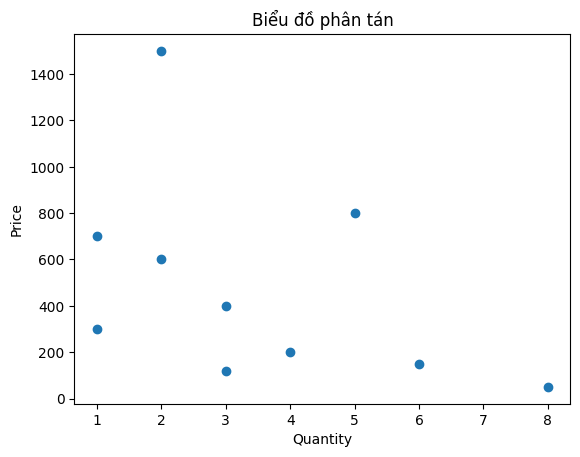

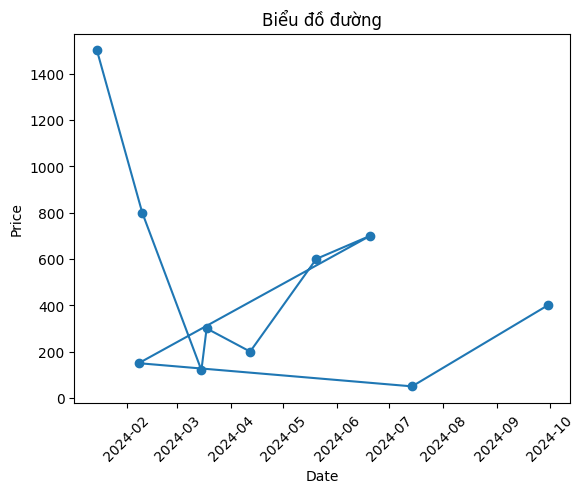

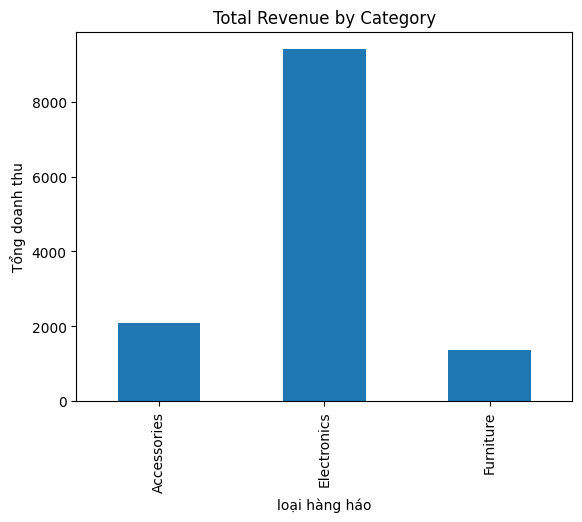

In [30]:
#CÂU 6,7,8,9
# 6
df['Price'].plot(kind='bar', title='Price Distribution')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

# 7
plt.scatter(df['Quantity'], df['Price'])
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Biểu đồ phân tán')
plt.show()

# 8
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Biểu đồ đường')
plt.xticks(rotation=45)
plt.show()

# 9
df['Revenue'] = df['Quantity'] * df['Price']
df.groupby('Category')['Revenue'].sum().plot(kind='bar', title='Total Revenue by Category')
plt.xlabel('loại hàng háo')
plt.ylabel('Tổng doanh thu')
plt.show()

In [31]:
#CÂU 10,11,12,13

print("Số lượng giá trị naN trong Dataframe:")
print(df.isna().sum())

df= df.drop_duplicates(subset='Product', keep='first')# trùng bỏ giữ hàng đầu
print(df)

fillter_df = df[df['Quantity'] > 5] #lọc ra lớn hơn 5
print(fillter_df)

df['Revenue'] = df['Quantity'] * df['Price'] 



Số lượng giá trị naN trong Dataframe:
Product     0
Category    0
Price       0
Date        0
Quantity    0
Revenue     0
dtype: int64
     Product     Category  Price       Date  Quantity  Revenue
0     Laptop  Electronics   1500 2024-01-15         2     3000
1      Phone  Electronics    800 2024-02-10         5     4000
2      Chair    Furniture    120 2024-03-15         3      360
3       Desk    Furniture    300 2024-03-18         1      300
4  Headphone  Accessories    200 2024-04-12         4      800
5    Monitor  Electronics    600 2024-05-20         2     1200
6       Sofa    Furniture    700 2024-06-20         1      700
7   Keyboard  Accessories    150 2024-02-08         6      900
8      Mouse  Accessories     50 2024-07-14         8      400
9     Tablet  Electronics    400 2024-09-30         3     1200
    Product     Category  Price       Date  Quantity  Revenue
7  Keyboard  Accessories    150 2024-02-08         6      900
8     Mouse  Accessories     50 2024-07-14      

In [32]:
#CÂU 14
def tinh_toasn_sale (dnhth):
    if dnhth < 500:
        return 'Low'
    elif 500 <= dnhth <= 2000:
        return 'Medium'
    else :
        return 'High'
df['Sales_Level'] = df['Revenue'].apply(tinh_toasn_sale)
print(df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level
0     Laptop  Electronics   1500 2024-01-15         2     3000        High
1      Phone  Electronics    800 2024-02-10         5     4000        High
2      Chair    Furniture    120 2024-03-15         3      360         Low
3       Desk    Furniture    300 2024-03-18         1      300         Low
4  Headphone  Accessories    200 2024-04-12         4      800      Medium
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium
6       Sofa    Furniture    700 2024-06-20         1      700      Medium
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium
8      Mouse  Accessories     50 2024-07-14         8      400         Low
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium


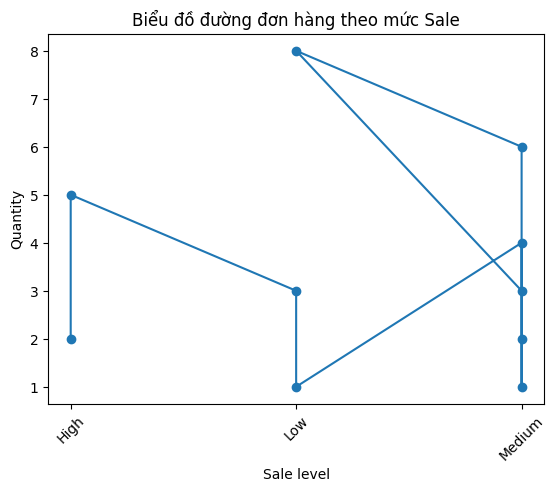

In [33]:
#CÂU 15
plt.plot(df['Sales_Level'], df['Quantity'], marker='o')
plt.xlabel('Sale level')
plt.ylabel('Quantity')
plt.title('Biểu đồ đường đơn hàng theo mức Sale')
plt.xticks(rotation=45)
plt.show()

In [34]:
#Câu 16:
def tinh_discount(revenue):
    if revenue >1000 :
        return 0.1
    else:
        return 0.05
df['Discount'] = df['Revenue'].apply(tinh_discount)

print (df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level  \
0     Laptop  Electronics   1500 2024-01-15         2     3000        High   
1      Phone  Electronics    800 2024-02-10         5     4000        High   
2      Chair    Furniture    120 2024-03-15         3      360         Low   
3       Desk    Furniture    300 2024-03-18         1      300         Low   
4  Headphone  Accessories    200 2024-04-12         4      800      Medium   
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium   
6       Sofa    Furniture    700 2024-06-20         1      700      Medium   
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium   
8      Mouse  Accessories     50 2024-07-14         8      400         Low   
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium   

   Discount  
0      0.10  
1      0.10  
2      0.05  
3      0.05  
4      0.05  
5      0.10  
6      0.05  
7      0.05  
8      0.05  
9

In [35]:
#CÂU 17,18,19
df['Final_Revenue'] = df['Revenue']-(df['Revenue'] * df['Discount'])
print(df)
df['Mouth'] = df['Date'].dt.month


     Product     Category  Price       Date  Quantity  Revenue Sales_Level  \
0     Laptop  Electronics   1500 2024-01-15         2     3000        High   
1      Phone  Electronics    800 2024-02-10         5     4000        High   
2      Chair    Furniture    120 2024-03-15         3      360         Low   
3       Desk    Furniture    300 2024-03-18         1      300         Low   
4  Headphone  Accessories    200 2024-04-12         4      800      Medium   
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium   
6       Sofa    Furniture    700 2024-06-20         1      700      Medium   
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium   
8      Mouse  Accessories     50 2024-07-14         8      400         Low   
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium   

   Discount  Final_Revenue  
0      0.10         2700.0  
1      0.10         3600.0  
2      0.05          342.0  
3      0.05          285.

In [36]:
df.to_csv('BKT_2274802010348_NguyenDuyHung.csv')